In [1]:
library("ggplot2")
library("dplyr")

files<-list.files("./FluViewPhase2Data/VisitData/",pattern="*csv", full.names=T)
n <- length(files)

# make a list of dataframes
data_list <- list()
for (i in 1:n) {
  data_list[[i]] <- read.csv(file = files[i], skip=1)
  
}

# get only necessary columns

for (i in 1:n) {
  data_list[[i]] <- as.data.frame(data_list[[i]][, c("WEEK", "X..WEIGHTED.ILI")])
}

new_df <- data.frame(c(40:53, 1:39))
names(new_df)[1] <- "WEEK" 
new_df$X..WEIGHTED.ILI <- 2.2
new_df$KEY <- 8

Warning message:
"package 'ggplot2' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
final_data <- bind_rows(data_list, .id="KEY")
final_data <- rbind(final_data, new_df)
final_data$WEEK <- factor(final_data$WEEK, levels = c(40:53, 1:39))

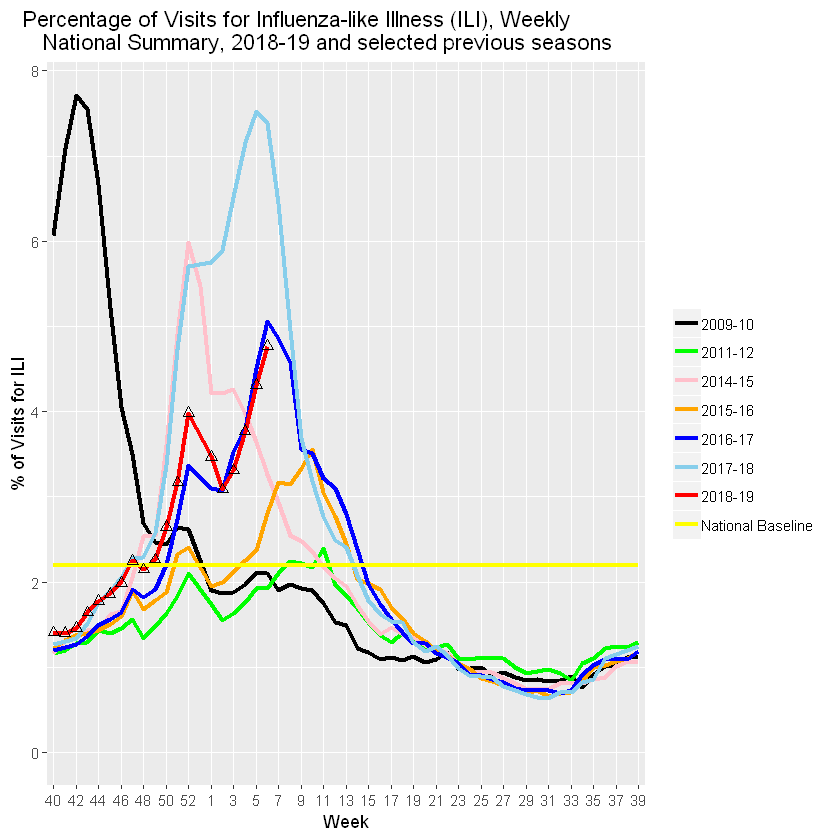

In [4]:
ggplot() + 
  geom_line(aes(WEEK, X..WEIGHTED.ILI, colour=KEY, group=KEY), final_data, size=1.3) +
  expand_limits(y = 0) + 
  ggtitle("Percentage of Visits for Influenza-like Illness (ILI), Weekly\n National Summary, 2018-19 and selected previous seasons") +
  xlab("Week") +
  ylab("% of Visits for ILI") +
  scale_color_manual(labels=c("2009-10", "2011-12", "2014-15", "2015-16", "2016-17", "2017-18","2018-19", "National Baseline")
                     , values=c("black", "green", "pink", "orange", "blue", "skyblue", "red", "yellow")) +
  scale_x_discrete(breaks = c(seq(40,53,by=2), seq(1,39,by=2)) ) +
  geom_point(aes(WEEK, X..WEIGHTED.ILI, shape=2), final_data[314:332,], size=2) +
  scale_shape_identity() +
  theme(legend.title=element_blank(), plot.title = element_text(hjust = -0.5))